In [1]:
import h5py
import scipy.io as io
from PIL import Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import cv2
from tqdm import tqdm
import scipy
from skimage.io import imread, imshow
from skimage.filters import prewitt_h, prewitt_v
from skimage.color import rgb2hsv
from scipy import ndimage, misc
from skimage.feature import hog
from skimage import exposure
from matplotlib import cm as CM
from skimage.transform import rescale, downscale_local_mean
import pandas as pd
from image import * 
import tensorflow as tf# Assuming this is a custom module you have created
%matplotlib inline


C:\Users\tigco\AppData\Local\Temp\ipykernel_23068\2612140729.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [52]:
root = os.path.join(os.getcwd(),'ShanghaiTech')
root="D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset"
part_A_train = os.path.join(root,'part_A_final\\train_data','images')
part_A_test = os.path.join(root,'part_A_final\\test_data','images')
part_B_train = os.path.join(root,'part_B_final\\train_data','images')
part_B_test = os.path.join(root,'part_B_final\\test_data','images')
path_sets = [part_A_train,part_A_test,part_B_train,part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(img_paths)

['D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_1.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_10.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_100.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_101.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_102.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_103.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_104.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_105.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\train_data\\images\\IMG_106.jpg', 'D:\\sem-4\\shape\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_fin

In [53]:
labels=[]
images=[]
arr_label=[]
for img_path in tqdm(img_paths):
    density_file_path=img_path.replace('.jpg', '.h5').replace('images', 'ground_truth')
    d_file=h5py.File(density_file_path,'r')
    density=np.asarray(d_file['density'])
    labels.append(np.sum(density))
    image = Image.open(img_path)
    image=image.resize((640,540))
    img_arr=np.array(image)
    images.append(img_arr)    
    arr_label.append(density)

100%|██████████████████████████████████████████████████████████████████████████████| 1198/1198 [01:54<00:00, 10.48it/s]


In [59]:
labels_dataset = pd.read_csv('labels.csv')
print ("Total number of Training dataset records are :", labels_dataset.shape)

Total number of Training dataset records are : (1198, 2)


In [60]:
type(labels_dataset)

pandas.core.frame.DataFrame

In [61]:
crowding_dataset=images

In [62]:
print(len(labels),len(crowding_dataset))

1198 1198


In [63]:
# Assuming crowding_dataset is a list of numpy arrays
for i in range(len(crowding_dataset)):
    arr = crowding_dataset[i]
    if arr.shape != (540, 640, 3):
        # Convert to (540, 640, 3) by replicating grayscale values along the third dimension
        arr_3d = np.repeat(arr[:, :, np.newaxis], 3, axis=2)
        # Replace arr with arr_3d in the crowding dataset
        crowding_dataset[i] = arr_3d

In [64]:
final_dataset_tf = tf.data.Dataset.from_tensor_slices((crowding_dataset[:500],labels[:500])) #using only 500 images 

In [13]:
len(final_dataset_tf)

500

In [14]:
len(final_dataset_tf1)

500

In [15]:
len(final_dataset_tf2)

198

In [65]:
final_dataset=tf.data.Dataset.from_tensor_slices((crowding_dataset,labels))#using 1198 images

In [66]:
val_size = 958
X_train = final_dataset.take(val_size)
X_test = final_dataset.skip(val_size)
len(X_train)

958

In [67]:
X_train_org= final_dataset.take(val_size)
X_test_org= final_dataset.skip(val_size)

In [68]:
print(tf.data.experimental.cardinality(X_train).numpy())
print(tf.data.experimental.cardinality(X_test).numpy())

958
240


In [69]:
y_train_count = []
y_test_count = []
for element2 in X_train:
    y_train_count.append(element2[1])
    #break
    
for element1 in X_test:
    y_test_count.append(element1[1])
    #break
print(y_test_count)

[<tf.Tensor: shape=(), dtype=float32, numpy=52.80738>, <tf.Tensor: shape=(), dtype=float32, numpy=122.72498>, <tf.Tensor: shape=(), dtype=float32, numpy=65.776794>, <tf.Tensor: shape=(), dtype=float32, numpy=293.6315>, <tf.Tensor: shape=(), dtype=float32, numpy=12.53433>, <tf.Tensor: shape=(), dtype=float32, numpy=9.443878>, <tf.Tensor: shape=(), dtype=float32, numpy=100.397804>, <tf.Tensor: shape=(), dtype=float32, numpy=140.96468>, <tf.Tensor: shape=(), dtype=float32, numpy=41.05891>, <tf.Tensor: shape=(), dtype=float32, numpy=225.10805>, <tf.Tensor: shape=(), dtype=float32, numpy=17.317997>, <tf.Tensor: shape=(), dtype=float32, numpy=39.021294>, <tf.Tensor: shape=(), dtype=float32, numpy=72.7649>, <tf.Tensor: shape=(), dtype=float32, numpy=233.38963>, <tf.Tensor: shape=(), dtype=float32, numpy=96.63585>, <tf.Tensor: shape=(), dtype=float32, numpy=58.059357>, <tf.Tensor: shape=(), dtype=float32, numpy=242.92873>, <tf.Tensor: shape=(), dtype=float32, numpy=183.50833>, <tf.Tensor: shap

In [70]:
seed=(1,2)
def preprocess_image(image,count):
    #image,count = image,count
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [400, 400])  #resizing the image to 400X400 pixels
    image = tf.image.random_flip_left_right(image) #fliping the image left to right
    image = tf.image.stateless_random_flip_up_down(image,seed) #flipping the image upside down

    image = tf.image.stateless_random_brightness(image, max_delta=32.0 / 255.0, seed=seed) #Randomly changing the brightness to the images
    image = tf.image.stateless_random_saturation(image, lower=0.5, upper=1.5, seed=seed) #Randomly changing saturation to the images

    return image,count

In [71]:
AUTOTUNE = tf.data.AUTOTUNE
X_train = X_train.map(preprocess_image, num_parallel_calls=AUTOTUNE)
X_test = X_test.map(preprocess_image, num_parallel_calls=AUTOTUNE)

In [72]:
X_train

<_ParallelMapDataset element_spec=(TensorSpec(shape=(400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [73]:
for element in X_train:
    print(element[1])
    break

tf.Tensor(1543.841, shape=(), dtype=float32)


In [74]:
y_test_count[0]

<tf.Tensor: shape=(), dtype=float32, numpy=52.80738>

In [75]:
y_test_count[2].numpy().astype("uint8")

65

In [76]:
#converting to list
y_test_count_actual=[]
for i in range (0,240) :
    y_test_count_actual.append(y_test_count[i].numpy().astype("uint8"))
    
    
#converting to list
y_train_count_actual=[]
for i in range (0,958) :
    y_train_count_actual.append(y_train_count[i].numpy().astype("uint8"))

In [77]:
y_test_count_actual

[52,
 122,
 65,
 37,
 12,
 9,
 100,
 140,
 41,
 225,
 17,
 39,
 72,
 233,
 96,
 58,
 242,
 183,
 180,
 102,
 97,
 157,
 52,
 35,
 18,
 86,
 43,
 54,
 165,
 210,
 56,
 99,
 88,
 8,
 83,
 47,
 13,
 46,
 125,
 174,
 185,
 144,
 52,
 83,
 101,
 68,
 147,
 86,
 32,
 48,
 135,
 24,
 133,
 46,
 154,
 105,
 66,
 188,
 41,
 67,
 69,
 150,
 142,
 136,
 1,
 90,
 94,
 157,
 59,
 237,
 88,
 75,
 124,
 25,
 208,
 178,
 191,
 64,
 47,
 164,
 74,
 91,
 84,
 172,
 139,
 98,
 83,
 116,
 101,
 56,
 101,
 213,
 23,
 12,
 29,
 123,
 86,
 45,
 191,
 128,
 48,
 82,
 34,
 50,
 180,
 136,
 92,
 32,
 23,
 54,
 56,
 75,
 44,
 203,
 137,
 50,
 159,
 57,
 189,
 84,
 35,
 64,
 52,
 195,
 56,
 86,
 144,
 21,
 221,
 34,
 51,
 64,
 85,
 17,
 42,
 87,
 113,
 175,
 87,
 65,
 41,
 149,
 24,
 61,
 200,
 94,
 57,
 48,
 189,
 30,
 76,
 64,
 170,
 108,
 221,
 198,
 42,
 61,
 173,
 90,
 54,
 50,
 26,
 46,
 49,
 166,
 41,
 191,
 39,
 163,
 154,
 37,
 83,
 43,
 89,
 73,
 31,
 36,
 102,
 27,
 151,
 84,
 67,
 79,
 32,
 78,
 4,
 1

In [82]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

In [9]:
batch_size=32
input_shape=(400, 400,3)

In [84]:
X_train = configure_for_performance(X_train)
X_test = configure_for_performance(X_test)

In [85]:
image_batch, label_batch = next(iter(X_train))

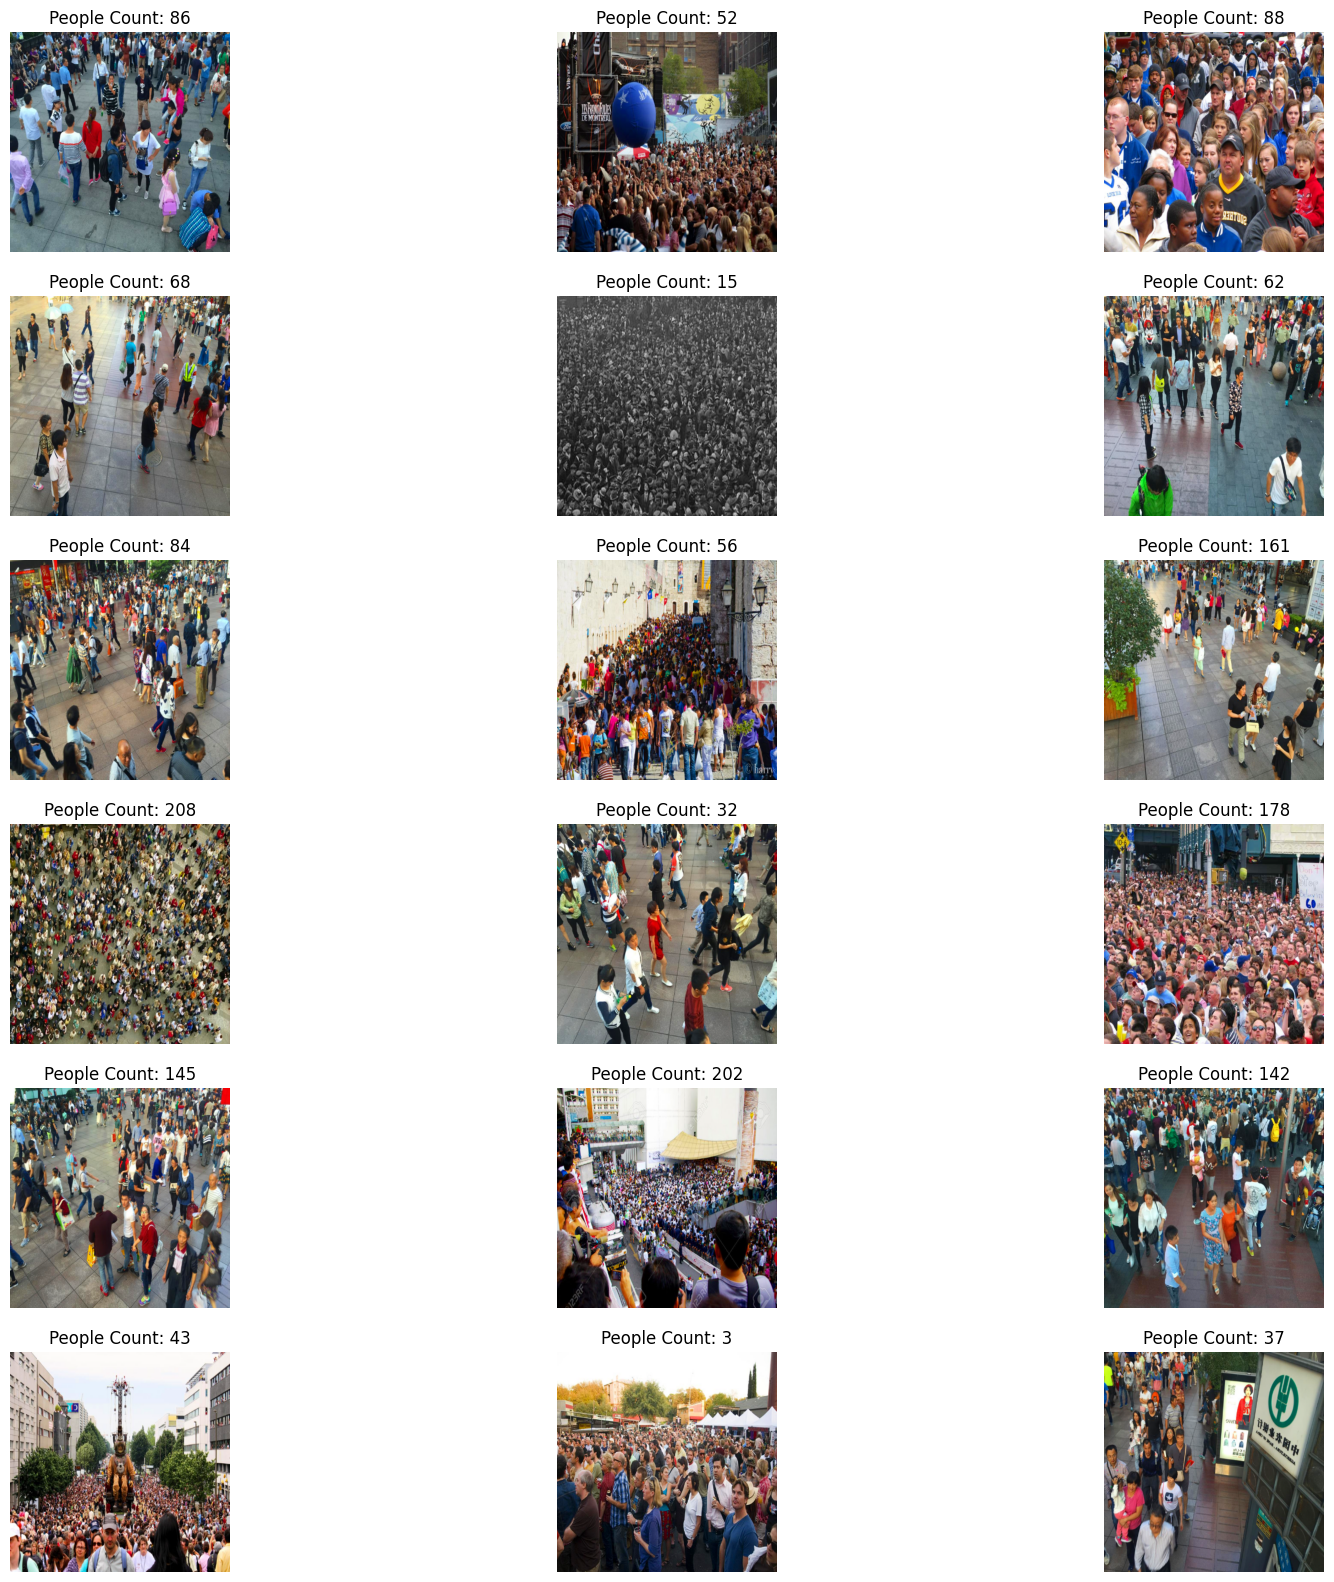

In [86]:
plt.figure(figsize=(20, 20))
for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    #label = label_batch[i]
    plt.title("People Count: "+str(label_batch[i].numpy().astype("uint8")))
    plt.axis("off")
    

In [87]:
len(image_batch)

32

In [10]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
#tf.set_random_seed(42)
tf.random.set_seed(42)

In [11]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=3,
    inter_op_parallelism_threads=3
)

In [12]:
# Import Keras
from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
#K.set_session(sess)
tf.compat.v1.keras.backend.set_session(sess)

In [13]:
from keras import Input, Model, Sequential
#from keras.layers import Conv2D, MaxPooling2D, Concatenate, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D,Dense,concatenate,Activation,Dropout,Input

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1))

In [15]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=1e-6), metrics=['mae','mse']
              )

In [16]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 396, 396, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 198, 198, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 198, 198, 64)      256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 198, 198, 64)      0         
                                                                 
 dense (Dense)               (None, 198, 198, 64)     

In [80]:
epochs=50
from tensorflow.keras.callbacks import ModelCheckpoint


from tensorflow.keras.callbacks import ModelCheckpoint
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
#monitor= tf.keras.callbacks.EarlyStopping(monitor=['mae'],patience=5, verbose=1, mode='auto')
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="./Model_3.hdf5",verbose=1,monitor='val_mae',save_best_only=True,save_freq='epoch')

Model_2 = model.fit(X_train,
          #batch_size=32,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test),
          callbacks=[checkpointer] 
          #callbacks=[ModelCheckpoint('./Model_2.hdf5', monitor='mae', verbose=1,
          #save_best_only=True,  save_freq='epoch')]
            )

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 189555.6719 - mae: 276.7735 - mse: 189555.6719 
Epoch 1: val_mae improved from inf to 609.72278, saving model to .\Model_3.hdf5
30/30 [==============================] - 1357s 37s/step - loss: 189555.6719 - mae: 276.7735 - mse: 189555.6719 - val_loss: 380812.8750 - val_mae: 609.7228 - val_mse: 380812.8750
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 105687.3203 - mae: 198.5002 - mse: 105687.3203 
Epoch 2: val_mae improved from 609.72278 to 147.28050, saving model to .\Model_3.hdf5
30/30 [==============================] - 1013s 32s/step - loss: 105687.3203 - mae: 198.5002 - mse: 105687.3203 - val_loss: 31160.6602 - val_mae: 147.2805 - val_mse: 31160.6602
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 80263.4844 - mae: 174.1830 - mse: 80263.4844  
Epoch 3: val_mae did not improve from 147.28050
30/30 [==============================] - 2515s 83s/step - loss: 80263.4844 - mae: 174

In [17]:
model.load_weights('./Model_3.hdf5')

In [102]:
#Predict the output

y_test_results_model2 = model.predict(X_test)
y_train_results_model2 = model.predict(X_train)

len(y_train_results_model2)

30/30 [==============================] - 226s 7s/step


958

In [31]:
#add to the dataframe
Model2_Train_results = pd.DataFrame()
Model2_Train_results['Train_Actual']= y_train_count_actual
Model2_Train_results['Train_Predicted']= np.round(y_train_results_model2)
Model2_Train_results['Train_Difference(actual-predicted)']  = Model2_Train_results['Train_Actual'] - Model2_Train_results['Train_Predicted']
Model2_Train_results['Train_Difference(actual-predicted)'] = Model2_Train_results['Train_Difference(actual-predicted)'].abs()
Model2_Train_results['index_column'] = Model2_Train_results.index

Model2_Test_results = pd.DataFrame()
Model2_Test_results['Test_Actual']= y_test_count_actual
Model2_Test_results['Test_Predicted']= np.round(y_test_results_model2)
#Model2_results['difference'] = y_Test_count_actual-y_Test_results_model2
Model2_Test_results['Test_Difference(actual-predicted)']  = Model2_Test_results['Test_Actual'] - Model2_Test_results['Test_Predicted']
Model2_Test_results['Test_Difference(actual-predicted)'] =Model2_Test_results['Test_Difference(actual-predicted)'].abs()
Model2_Test_results['index_column'] = Model2_Test_results.index
Model2_Test_results

NameError: name 'y_train_count_actual' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

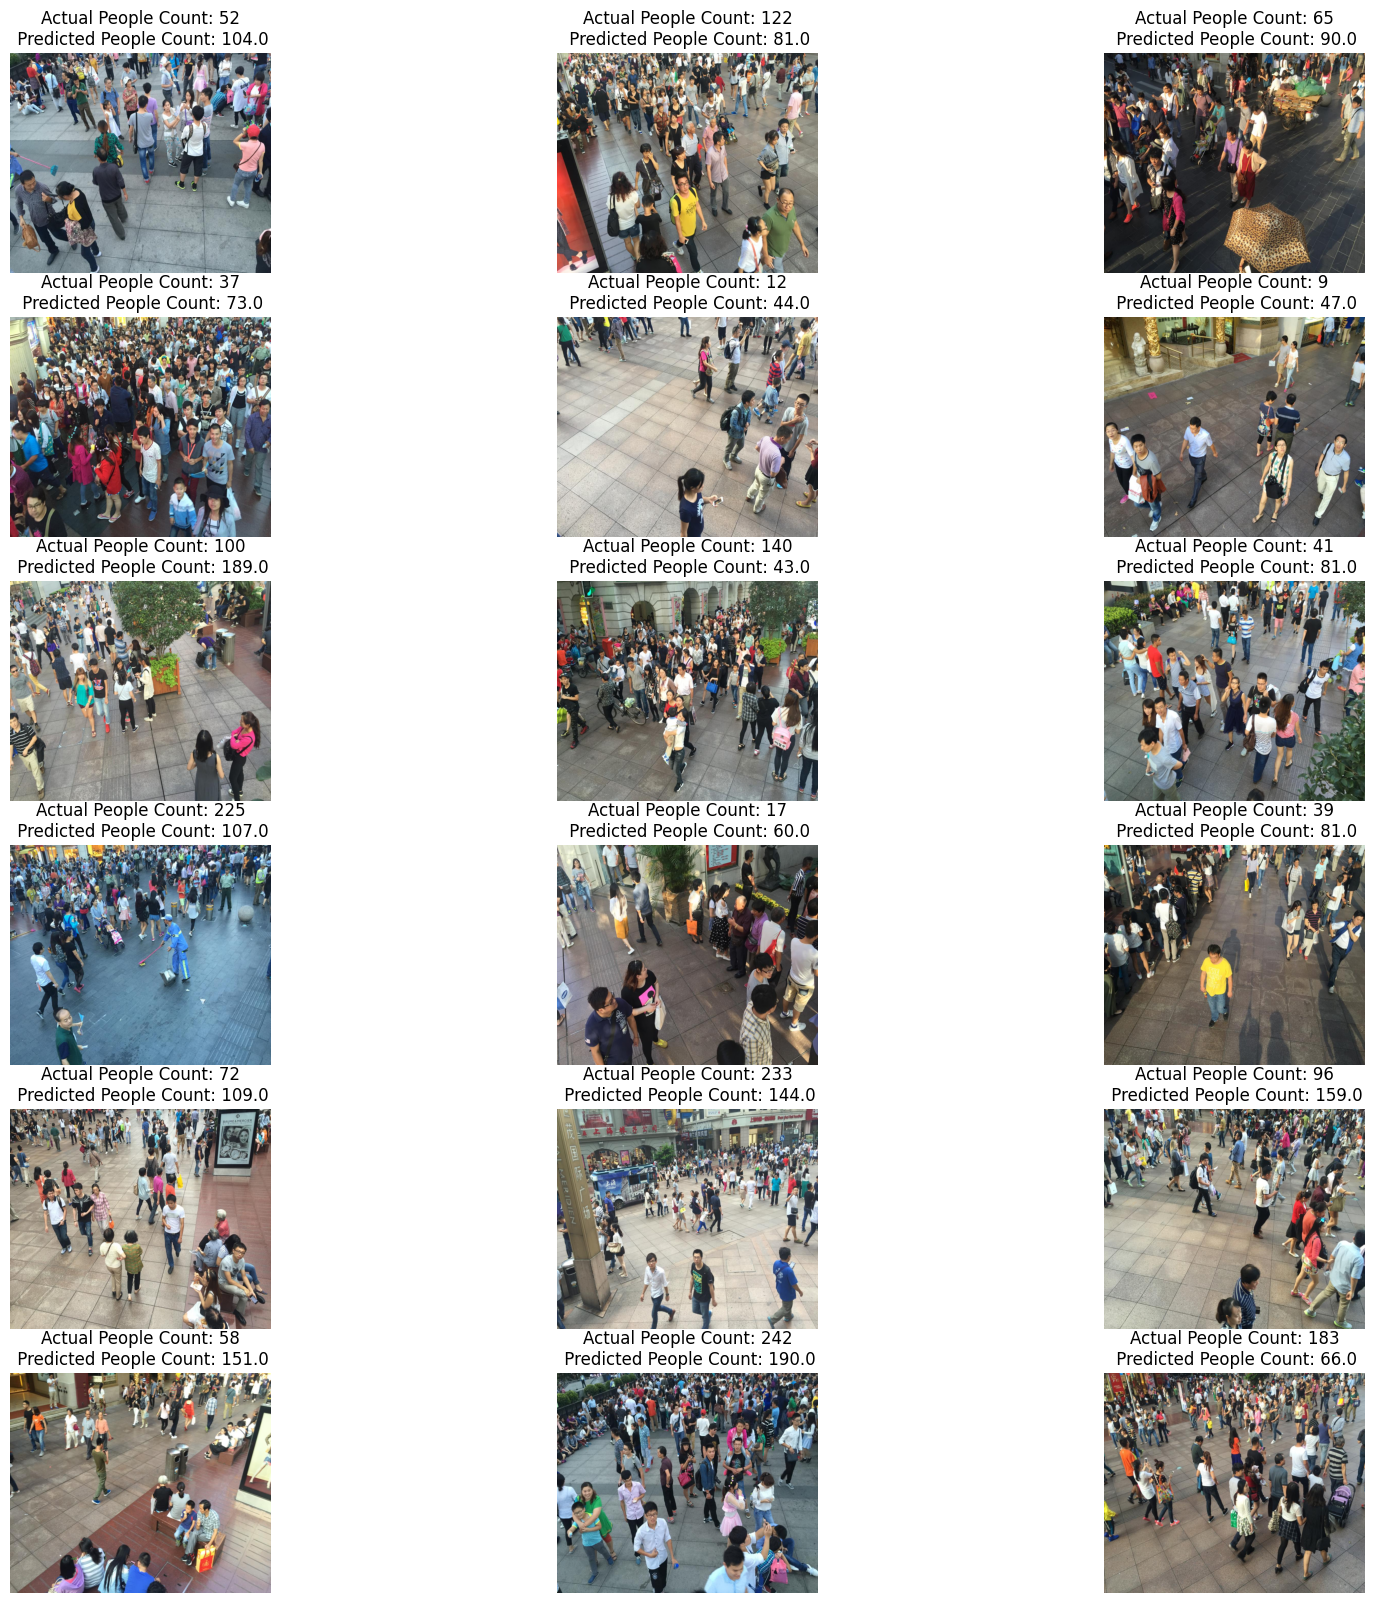

In [84]:
#Print Test Actual vs Predict

plt.figure(figsize=(20, 20))
i=0
for element15 in X_test_org:
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(element15[0].numpy().astype("uint8"))
    #label = label_batch[i]
    #plt.title("Actual People Count: "+str(Model2_results['actual'][i]))
    plt.title("Actual People Count: "+str(Model2_Test_results['Test_Actual'][i])+ "\n Predicted People Count: "+str(Model2_Test_results['Test_Predicted'][i]))
    plt.axis("off")
    i+=1
    if i>17:
        break
plt.show

In [108]:
#Top_least_predicted_Model2_18 = Model2_Train_results_sort[0:18].sort_values('index_column', ascending=True)
Train_Top_best_predicted_Model2_18 = Model2_Test_results.sort_values('Test_Difference(actual-predicted)', ascending=True)
Train_Top_best_predicted_Model2_18_sort = Train_Top_best_predicted_Model2_18[0:18].sort_values('index_column', ascending=True)
Train_Top_best_predicted_Model2_18_sort.head(18)0

Test_Actual  Test_Predicted  Test_Difference(actual-predicted)  \
8             41            47.0                                6.0   
19           102            95.0                                7.0   
32            88            81.0                                7.0   
41           144           137.0                                7.0   
42            52            51.0                                1.0   
44           101           105.0                                4.0   
71            75            72.0                                3.0   
122           52            57.0                                5.0   
125           86            90.0                                4.0   
129           34            35.0                                1.0   
132           85            87.0                                2.0   
143           61            61.0                                0.0   
145           94            98.0                                4.0   
164           49            43.0                                6.0   
174           89            93.0                                4.0   
189           44            48.0                                4.0   
194           91            88.0                                3.0   
225           47            51.0                                4.0   

     index_column  
8               8  
19             19  
32             32  
41             41  
42             42  
44             44  
71             71  
122           122  
125           125  
129           129  
132           132  
143           143  
145           145  
164           164  
174           174  
189           189  
194           194  
225           225

## Best Predictions-Display Images

## Density 

In [4]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [38]:
prediction=50

In [ ]:
# Load sparse matrix
i = 0
for img_path in tqdm(img_paths):
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    
    # Read image
    img = plt.imread(img_path)
    # Create a zero matrix of image size
    k = np.zeros((img.shape[0], img.shape[1]))
    
    gt = mat["image_info"][0, 0][0, 0][0]
    
    # Generate hot encoded matrix of sparse matrix
    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    
    # Generate density map
    k = gaussian_filter_density(k)
    
    # File path to save density map
    file_path = img_path.replace('.jpg', '.h5').replace('images', 'ground_truth')
    
    with h5py.File(file_path, 'w') as hf:
        hf.create_dataset('density', data=k)  # Save density map


## Testing

In [33]:
img=Image.open("C:\\Users\\tigco\\Downloads\\WhatsApp Image 2024-05-03 at 10.29.18.jpeg")
new_size=(400,400)
img=img.resize(new_size)
arr=np.array(img)
tensor = tf.convert_to_tensor(arr)
tensor = tf.expand_dims(tensor, axis=0)

prediction=model.predict(tensor)

1/1 [==============================] - 0s 183ms/step


In [40]:
print(prediction)

50


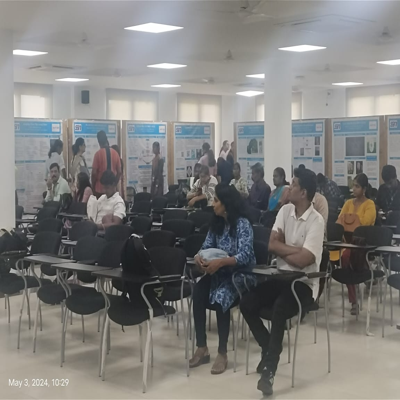

In [35]:
img

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have a test dataset X_test and y_test
# Assuming model is your trained CNN model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_count_actual, y_pred)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_count_actual, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



8/8 [==============================] - 23s 3s/step
Mean Squared Error (MSE): 10320.043
Mean Absolute Error (MAE): 79.0999


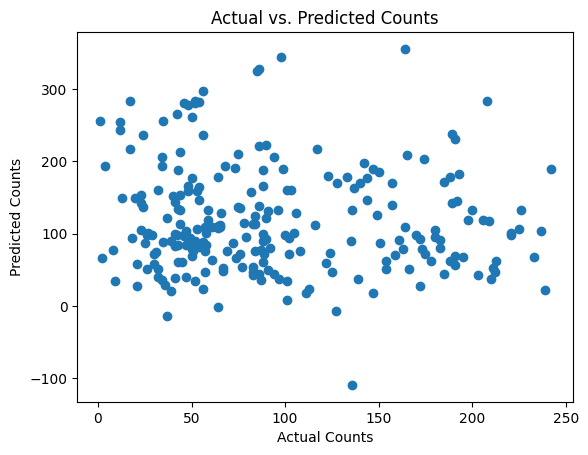

In [93]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted counts
plt.scatter(y_test_count_actual, y_pred)
plt.xlabel("Actual Counts")
plt.ylabel("Predicted Counts")
plt.title("Actual vs. Predicted Counts")
plt.show()

In [94]:
model.history

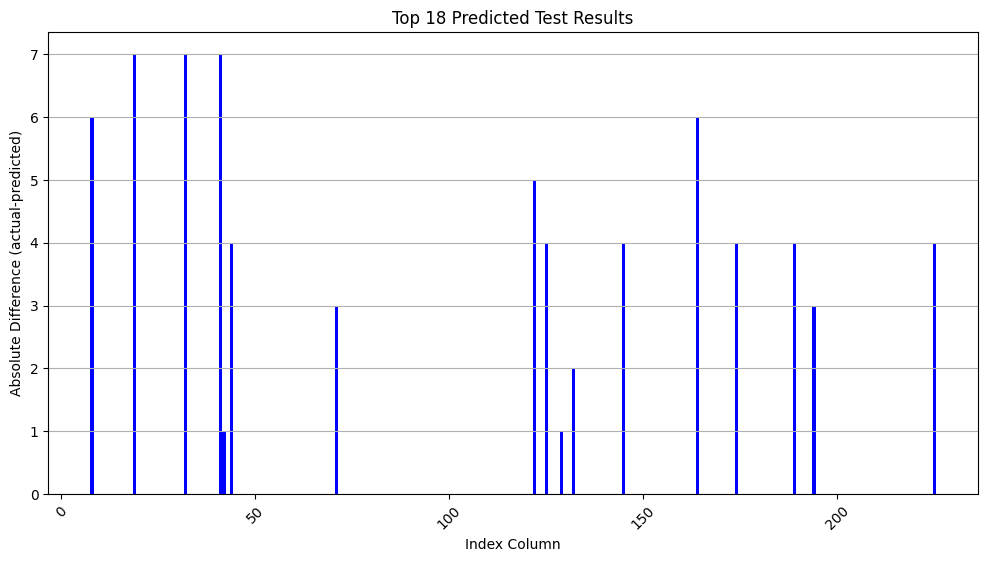

In [113]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(Train_Top_best_predicted_Model2_18_sort['index_column'], Train_Top_best_predicted_Model2_18_sort['Test_Difference(actual-predicted)'], color='blue')
plt.xlabel('Index Column')
plt.ylabel('Absolute Difference (actual-predicted)')
plt.title('Top 18 Predicted Test Results')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
